# <span style = "color:red;"> Multiclass Classification </span>


In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
import numpy as np

X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]
y_train = y_train.astype(np.int8)

In [4]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36011]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()


<Figure size 640x480 with 1 Axes>

In [5]:
#Shuffle the dataset

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state = 42)
sgd_clf.fit(X_train, y_train)

sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [7]:
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score

array([[-190493.99818851, -326924.0606051 , -319358.52831969,
        -114069.88621897, -399687.63716629,  106965.7776335 ,
        -704564.71659912,  -94741.20175794, -221243.05021451,
        -422779.95868188]])

In [8]:
np.argmax(some_digit_score)

5

In [9]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [10]:
sgd_clf.classes_[5]

5

In [11]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

len(ovo_clf.estimators_)

45

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])


array([5], dtype=int8)

In [13]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.84753049, 0.86849342, 0.8560284 ])

## <span style = "color:blue;"> Error Analysis </span>


In [15]:
#To achieve higher accuracy you can scale inputs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.910018  , 0.90724536, 0.91168675])

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)

In [17]:
from sklearn.metrics import confusion_matrix

cnf_mtx = confusion_matrix(y_train, y_train_pred)
cnf_mtx

array([[5726,    2,   16,    9,   11,   48,   51,    9,   47,    4],
       [   1, 6473,   50,   26,    6,   49,    8,   13,  108,    8],
       [  49,   39, 5325,  106,   83,   19,   93,   58,  173,   13],
       [  49,   41,  147, 5321,    5,  232,   38,   58,  141,   99],
       [  14,   28,   42,    7, 5374,   12,   55,   29,   78,  203],
       [  82,   40,   32,  182,   78, 4592,  110,   33,  185,   87],
       [  32,   28,   46,    2,   47,   87, 5621,    5,   50,    0],
       [  18,   19,   69,   32,   55,   11,    5, 5806,   18,  232],
       [  43,  151,   68,  153,   15,  150,   55,   25, 5060,  131],
       [  43,   34,   30,   89,  160,   39,    2,  190,   81, 5281]],
      dtype=int64)

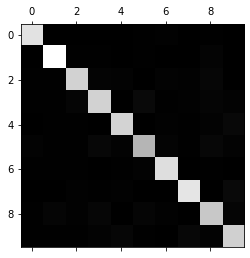

In [18]:
plt.matshow(cnf_mtx, cmap = plt.cm.gray)
plt.show()

In [19]:
row_sums = cnf_mtx.sum(axis = 1, keepdims = True)
norm_cnf_mtx = cnf_mtx / row_sums

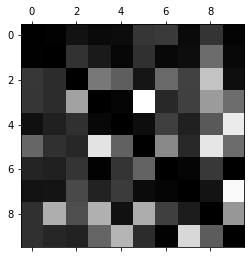

In [20]:
np.fill_diagonal(norm_cnf_mtx, 0)
plt.matshow(norm_cnf_mtx, cmap = plt.cm.gray)
plt.show() #rows --> actual classes, columns --> predicted classesb

In [21]:
def plot_digits(instances, images_per_row=10, **options):
    
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
        
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

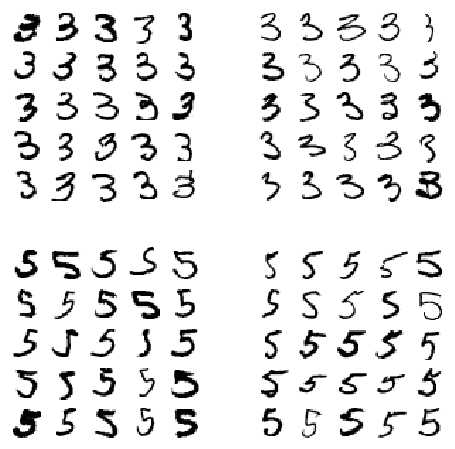

In [22]:
cl_a, cl_b = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()


## <span style = "color:blue;"> Multilabel Classification </span>


In [23]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
knn_clf.predict([some_digit])

array([[False,  True]])

## <span style = "color:blue;"> Multioutput Classification </span>


In [25]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [26]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

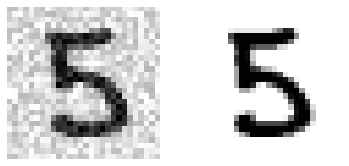

In [27]:
some_index = 5510
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()


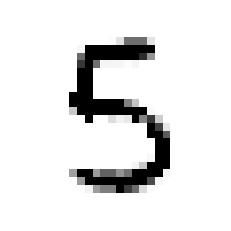

In [28]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

# <span style = "color:red;"> Excercise 1 </span>

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint:
the KNeighborsClassifier works quite well for this task; you just need to find good
hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'wights':['uniform', 'distance'], 'n_neighbors':[3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv = 5, verbose = 3, n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter wights for estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform'). Check the list of available parameters with `estimator.get_params().keys()`.